# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Cahya Abdurrahman
- **Email:** cahyaabd@upi.edu
- **ID Dicoding:** cahya_a

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Di musim apa rental sepeda paling tinggi dan paling rendah?
- Pertanyaan 2 : Bagaimana pola rental sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [6]:
hari_df = pd.read_csv("data/day.csv", delimiter=",")
jam_df = pd.read_csv("data/hour.csv", delimiter=",")
merged_df = jam_df.merge(hari_df, on="dteday", suffixes=("_jam", "_hari"))


**Insight:**
- Menggabungkan data rental hari dan jam 


### Assessing Data

In [7]:
merged_df.isnull().sum()

instant_jam        0
dteday             0
season_jam         0
yr_jam             0
mnth_jam           0
hr                 0
holiday_jam        0
weekday_jam        0
workingday_jam     0
weathersit_jam     0
temp_jam           0
atemp_jam          0
hum_jam            0
windspeed_jam      0
casual_jam         0
registered_jam     0
cnt_jam            0
instant_hari       0
season_hari        0
yr_hari            0
mnth_hari          0
holiday_hari       0
weekday_hari       0
workingday_hari    0
weathersit_hari    0
temp_hari          0
atemp_hari         0
hum_hari           0
windspeed_hari     0
casual_hari        0
registered_hari    0
cnt_hari           0
dtype: int64

Mengecek apakah ada data yang terduplikat

In [8]:
merged_df.duplicated().sum()

np.int64(0)

### Cleaning Data

Menghilangkan missing value dengan metode drop

In [9]:
merged_df.dropna(axis=0, inplace=True)

Menghilangkan outlier dengan metode drop

In [10]:
numerik_df = merged_df.select_dtypes(include=['number'])

Q1 = numerik_df.quantile(0.25)
Q3 = numerik_df.quantile(0.75)
IQR = Q3 - Q1

minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)

outlier_indices = numerik_df[((numerik_df < minimum) | (numerik_df > maximum)).any(axis=1)].index

merged_df.drop(index=outlier_indices, inplace=True)


Menghilangkan data duplikat

In [11]:
merged_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore the merged data

Melihat tabel apa saja pada data

In [12]:
print(merged_df.columns)


Index(['instant_jam', 'dteday', 'season_jam', 'yr_jam', 'mnth_jam', 'hr',
       'holiday_jam', 'weekday_jam', 'workingday_jam', 'weathersit_jam',
       'temp_jam', 'atemp_jam', 'hum_jam', 'windspeed_jam', 'casual_jam',
       'registered_jam', 'cnt_jam', 'instant_hari', 'season_hari', 'yr_hari',
       'mnth_hari', 'holiday_hari', 'weekday_hari', 'workingday_hari',
       'weathersit_hari', 'temp_hari', 'atemp_hari', 'hum_hari',
       'windspeed_hari', 'casual_hari', 'registered_hari', 'cnt_hari'],
      dtype='object')


Melihat jumlah rental dan rata-rata rental pada weekday dan weekend

In [13]:
weekday_usage = merged_df.groupby("weekday_hari")["cnt_hari"].sum().reset_index()
weekday_usage.columns = ["Weekday (0=Senin, ..., 6=Minggu)", "Total Rental"]

workingday_usage = merged_df.groupby("workingday_hari")["cnt_hari"].sum().reset_index()
workingday_usage.columns = ["Workday (0=Akhir Pekan/Libur, 1=Hari Kerja)", "Total Rental"]

holiday_usage = merged_df.groupby("holiday_hari")["cnt_hari"].sum().reset_index()
holiday_usage.columns = ["Holiday (0=Hari Biasa, 1=Hari Libur)", "Total Rental"]

avg_weekday = weekday_usage[weekday_usage["Weekday (0=Senin, ..., 6=Minggu)"] < 5]["Total Rental"].mean()
avg_weekend = weekday_usage[weekday_usage["Weekday (0=Senin, ..., 6=Minggu)"] >= 5]["Total Rental"].mean()

print("Jumlah Rental Berdasarkan Weekday:")
print(weekday_usage.to_string(index=False))


print("\nJumlah Rental Berdasarkan Workday:")
print(workingday_usage.to_string(index=False))

print(f"Rata-rata rental pada hari kerja (Weekday): {avg_weekday:.2f}")
print(f"Rata-rata rental pada akhir pekan (Weekend): {avg_weekend:.2f}")

print("\nJumlah Rental Berdasarkan Holiday:")
print(holiday_usage.to_string(index=False))

Jumlah Rental Berdasarkan Weekday:
 Weekday (0=Senin, ..., 6=Minggu)  Total Rental
                                0       6256860
                                1       8334381
                                2      10051612
                                3       9932240
                                4      10155794
                                5      10146848
                                6       5537670

Jumlah Rental Berdasarkan Workday:
 Workday (0=Akhir Pekan/Libur, 1=Hari Kerja)  Total Rental
                                           0      11794530
                                           1      48620875
Rata-rata rental pada hari kerja (Weekday): 8946177.40
Rata-rata rental pada akhir pekan (Weekend): 7842259.00

Jumlah Rental Berdasarkan Holiday:
 Holiday (0=Hari Biasa, 1=Hari Libur)  Total Rental
                                    0      60415405


**Insight:**
- Jumlah rental terbanyak adalah pada hari rabu, jumat, dan sabtu dengan perbedaan yang sedikit.
- Pada hari kerja, jumlah rental lebih banyak dibandingkan dengan akhir pekan.

Melihat jumlah rental berdasarkan jam

In [14]:
hourly_usage = merged_df.groupby("hr")["cnt_jam"].sum().reset_index()
hourly_usage.columns = ["Jam (0-23)", "Total Rental"]

print("Jumlah Rental Berdasarkan Jam:")
print(hourly_usage.to_string(index=False))


Jumlah Rental Berdasarkan Jam:
 Jam (0-23)  Total Rental
          0         31844
          1         18866
          2         12447
          3          6319
          4          3748
          5         13248
          6         52173
          7        134961
          8        117163
          9        139251
         10         91824
         11         98745
         12        114095
         13        111766
         14         98548
         15        107928
         16        150703
         17        113387
         18        130914
         19        163058
         20        144189
         21        110374
         22         83558
         23         55644


**Insight:**
- Jumlah rental terbanyak terdapat pada jam kerja adalah jam 10 pagi
- Jumlah rental terbanyak terdapat pada jam pulang kerja adalah jam 8 malam

Melihat hari apa yang paling banyak rental

In [15]:
weekday_usage = merged_df.groupby("weekday_hari")["cnt_hari"].sum().reset_index()
weekday_usage.columns = ["Hari dalam Seminggu (0=Senin, dst)", "Total Rental"]
print(weekday_usage.to_string(index=False))

 Hari dalam Seminggu (0=Senin, dst)  Total Rental
                                  0       6256860
                                  1       8334381
                                  2      10051612
                                  3       9932240
                                  4      10155794
                                  5      10146848
                                  6       5537670


**Insight:**
- Jumlah rental terbanyak terdapat pada hari sabtu
- Hari sabtu memiliki jumlah rental yang paling banyak dimungkinkan karena weekend

Melihat jumlah pengguna dan member yang merental

In [17]:
user_type_usage = merged_df[["casual_jam", "registered_jam"]].sum().reset_index()
user_type_usage.columns = ["Tipe Pengguna", "Total Rental"]

print("Jumlah Pengguna Kasual dan Terdaftar:")
print(user_type_usage.to_string(index=False))


Jumlah Pengguna Kasual dan Terdaftar:
 Tipe Pengguna  Total Rental
    casual_jam        329380
registered_jam       1775373


**Insight:**
- Jumlah pengguna member lebih banyak dibandingkan dengan jumlah pengguna kasual

Jumlah pengguna rental berdasarkan musim

In [18]:
season_usage = merged_df.groupby("season_hari")["cnt_hari"].sum().reset_index()
season_usage.columns = ["Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)", "Total Rental"]

print("Total Penyewaan Berdasarkan Musim:")
print(season_usage.to_string(index=False))


Total Penyewaan Berdasarkan Musim:
 Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)  Total Rental
                                            1       9488514
                                            2      15503080
                                            3      19350349
                                            4      16073462


**Insight:**
- Jumlah pengguna rental paling banyak pada musim gugur

Melihat jumlah rental berdasarkan tahun dan musim

In [19]:
season_year_usage = merged_df.groupby(["yr_hari", "season_hari"])["cnt_hari"].sum().reset_index()
season_year_usage.columns = ["Tahun (0=2011, 1=2012)", "Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)", "Total Rental"]

print("Total Penyewaan Berdasarkan Musim dan Tahun:")
print(season_year_usage.to_string(index=False))


Total Penyewaan Berdasarkan Musim dan Tahun:
 Tahun (0=2011, 1=2012)  Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)  Total Rental
                      0                                             1       3190458
                      0                                             2       7167553
                      0                                             3       8597797
                      0                                             4       6884690
                      1                                             1       6298056
                      1                                             2       8335527
                      1                                             3      10752552
                      1                                             4       9188772


**Insight:**
- Jumlah pengguna rental paling banyak terdapat pada tahun 2012 di musim gugur

Melihat jumlah rental berdasarkan suhu udara

In [26]:
temperature_usage = merged_df.groupby("temp_hari")["cnt_hari"].sum().reset_index()
temperature_usage.columns = ["Suhu Normalisasi", "Total Rental"]

print("Total Penyewaan Berdasarkan Suhu:")
print(temperature_usage.to_string(index=False))


Total Penyewaan Berdasarkan Suhu:
 Suhu Normalisasi  Total Rental
         0.059130         22563
         0.096522         22678
         0.097391         32568
         0.107500         56832
         0.134783         36915
         0.138333         18084
         0.144348         35374
         0.150000         40248
         0.150833         31704
         0.160870         32683
         0.162500         47448
         0.165000         54842
         0.166667         55464
         0.169091         27786
         0.172727         23240
         0.173333         29923
         0.177500         32403
         0.180000         59832
         0.180833         36024
         0.182222         26100
         0.186957         34100
         0.189091         38412
         0.190000         79008
         0.192174         31280
         0.195000          3448
         0.196364         29678
         0.196522         59984
         0.198333         38755
         0.200000         35926
      

**Insight:**
- Jumlah pengguna rental cenderung lebih banyak ketika suhu sedang

Melihat total rental berdasarkan kelembapan

In [25]:
humidity_usage = merged_df.groupby("hum_hari")["cnt_hari"].sum().reset_index()
humidity_usage.columns = ["Kelembapan Normalisasi", "Total Rental"]

print("Total Penyewaan Berdasarkan Kelembapan:")
print(humidity_usage.to_string(index=False))


Total Penyewaan Berdasarkan Kelembapan:
 Kelembapan Normalisasi  Total Rental
               0.275833         82704
               0.290000        102040
               0.302174         46644
               0.305000        104328
               0.311250         77832
               0.314167         58200
               0.314348         36300
               0.317500         83775
               0.318333         38755
               0.333478        106300
               0.350417         86478
               0.354167        127488
               0.360000        146700
               0.360417        126540
               0.373333        133956
               0.374167        129140
               0.377083        116280
               0.379167         52989
               0.390417        133820
               0.394167         57408
               0.395833        100349
               0.396250        128688
               0.396667        121896
               0.400000         22563
          

**Insight:**
- Jumlah pengguna rental tidak terpengaruh oleh kelembapan udara


Mengekstrak hasil data frame yang baru

In [27]:
merged_df.to_csv("merged_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di musim apa rental sepeda paling tinggi dan paling rendah?

C:\Users\Cahya\AppData\Local\Temp\ipykernel_20440\3028552061.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_usage["Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)"],


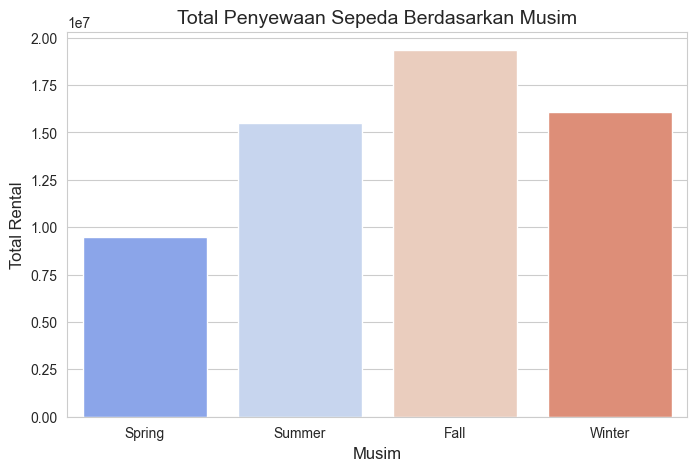

In [24]:
sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
sns.barplot(x=season_usage["Musim (1=Spring, 2=Summer, 3=Fall, 4=Winter)"], 
            y=season_usage["Total Rental"], 
            palette="coolwarm")

plt.xlabel("Musim", fontsize=12)
plt.ylabel("Total Rental", fontsize=12)
plt.title("Total Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

**Insight:**
- Jumlah pengguna rental paling banyak pada musim gugur dengan musim semi sebagai jumlah pengguna rental paling sedikit

### Pertanyaan 2: Bagaimana pola rental sepeda berdasarkan jam dalam sehari?

C:\Users\Cahya\AppData\Local\Temp\ipykernel_20440\3858315870.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_usage["Jam"], y=hourly_usage["Total Rental"], palette="viridis")


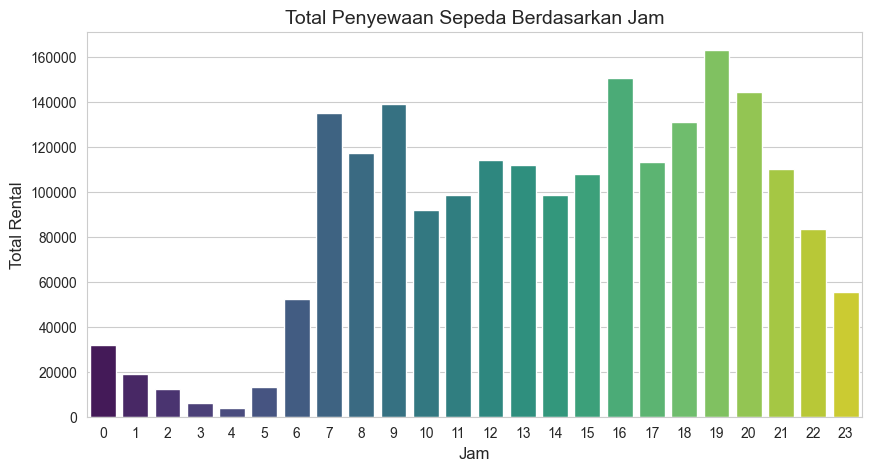

In [ ]:
hourly_usage = merged_df.groupby("hr")["cnt_jam"].sum().reset_index()
hourly_usage.columns = ["Jam", "Total Rental"]

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_usage["Jam"], y=hourly_usage["Total Rental"], palette="viridis")

plt.xlabel("Jam", fontsize=12)
plt.ylabel("Total Rental", fontsize=12)
plt.title("Total Penyewaan Sepeda Berdasarkan Jam", fontsize=14)

plt.show()

**Insight:**
- Jumlah rental terbanyak terdapat pada jam kerja adalah jam 10 pagi
- Jumlah rental terbanyak terdapat pada jam pulang kerja adalah jam 8 malam

## Conclusion

- Conclusion pertanyaan 1 : Berdasarkan analisis data yang telah dilakukan pada jumlah rental berdasarkan musim, dapat dilihat bahwa jumlah rental terbanyak terdapat pada musim gugur, lalu musim dingin, musim panas, dan yang terakhir yaitu musim semi
- Conclution pertanyaan 2 : Berdasarkan analisis data yang telah dilakukan pada jumlah rental berdasarkan jam, dapat dilihat bahwa jam berangkat kerja (jam 8-10 pagi) jumlah rental meningkat drastis dibandingkan dengan jam-jam sebelumnya. Hal yang sama pun juga terjadi pada jam pulang kerja (jam 7-9 malam).